# CIFAR-10 Luokitteluprojekti (FCN)


#### Data preparation

In [45]:
from keras.src.utils import to_categorical
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train.reshape(-1, 32 * 32 * 3)
X_test = X_test.reshape(-1, 32 * 32 * 3)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


#### Modeling

In [55]:
from keras import backend as K
from keras import layers

print(K.backend())

# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

tensorflow


In [56]:
model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5012 - loss: 1.4174 - val_accuracy: 0.4591 - val_loss: 1.5443
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5009 - loss: 1.4146 - val_accuracy: 0.4589 - val_loss: 1.5287
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4970 - loss: 1.4082 - val_accuracy: 0.4467 - val_loss: 1.5678
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4934 - loss: 1.4184 - val_accuracy: 0.4607 - val_loss: 1.5232
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5014 - loss: 1.3945 - val_accuracy: 0.4566 - val_loss: 1.5391
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5030 - loss: 1.3947 - val_accuracy: 0.4650 - val_loss: 1.5420
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5093 - loss: 1.3860 - val_accuracy: 0.4627 - val_loss: 1.5347


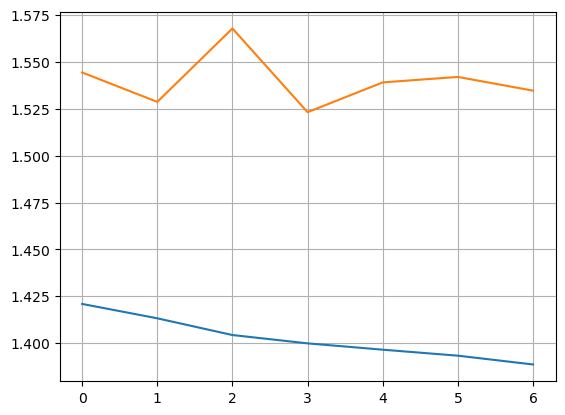

In [64]:
from matplotlib import pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [65]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - 1ms/step - accuracy: 0.4722 - loss: 1.4967
Test loss: 1.4967236518859863
Test accuracy: 0.4722000062465668
